<a href="https://colab.research.google.com/github/riddhi-jain/Way-to-Machine-Learning/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("/content/salaryData.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.shape

(30, 2)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
dataset.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [10]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
dataset.iloc[2:7]

,YearsExperience,Salary
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [12]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [13]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [14]:
dataset.nunique()

YearsExperience    28
Salary             30
dtype: int64

Visualisation using scatterplot





In [15]:
x  = dataset.YearsExperience
y = dataset.Salary

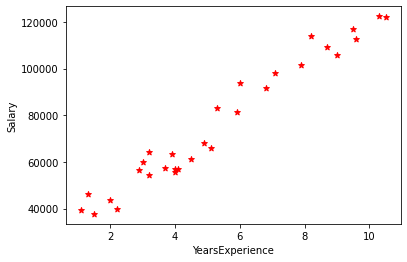

In [16]:
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.scatter(x, y, color = 'red', marker = '*');

Splitting into test and training datasets

In [17]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, 1]

In [18]:
import sklearn 
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 1) 

Creating simple linear model

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.924085047844632

In [21]:
y_pred = model.predict(xtest)
y_pred

array([ 74675.37776747,  91160.02832519,  61853.98288925,  81086.07520659,
        67348.86640849,  88412.58656557, 113139.56240215,  44453.51841166,
       105813.05104316,  98486.53968418])

In [22]:
ytest

17     83088.0
21     98273.0
10     63218.0
19     93940.0
14     61111.0
20     91738.0
26    116969.0
3      43525.0
24    109431.0
22    101302.0
Name: Salary, dtype: float64

In [23]:
model.coef_

array([9158.13919873])

In [24]:
model.intercept_

26137.24001419694

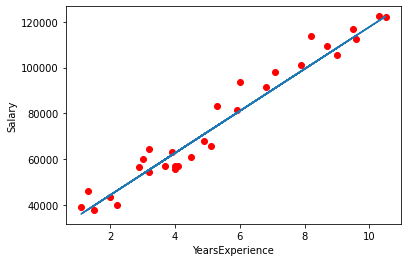

In [25]:
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.scatter(x, y, color = 'red', marker = 'o')
plt.plot(xtrain, model.predict(xtrain));

Saving the model

In [27]:
# using pickle library
import pickle

In [28]:
with open('salarymodel_save_pickle', 'wb') as file:
  pickle.dump(model, file)

Loading model and predicting

In [29]:
with open('salarymodel_save_pickle', 'rb') as file:
  newmodel = pickle.load(file)

In [30]:
newmodel.predict([[5]])

array([71927.93600785])

In [32]:
newmodel.coef_

array([9158.13919873])

In [37]:
# using joblib library(from sklearn)
# joblib is preffered with bigger arrays

from sklearn.externals import joblib
joblib.dump(model, 'salary_model_joblib')

['salary_model_joblib']

In [39]:
newmodel = joblib.load('salary_model_joblib')